In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

In [12]:
data = pd.read_csv('/content/drive/MyDrive/semester project (AI)/Copy of loan.csv')

In [13]:
# Check for missing values
print(data.isnull().sum())



Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [14]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
data['LoanAmount'] = imputer.fit_transform(data[['LoanAmount']])


In [15]:
# Encoding categorical variables
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Married'] = encoder.fit_transform(data['Married'])
data['Education'] = encoder.fit_transform(data['Education'])
data['Self_Employed'] = encoder.fit_transform(data['Self_Employed'])
data['Property_Area'] = encoder.fit_transform(data['Property_Area'])

In [16]:
# Handling outliers (assuming 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' have outliers)
# You can use different techniques such as Winsorization or removing outliers based on IQR
# For simplicity, we will just cap outliers using a quantile-based approach
quantiles = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].quantile([0.25, 0.75])
lower_quantiles = quantiles.loc[0.25]
upper_quantiles = quantiles.loc[0.75]
IQR = upper_quantiles - lower_quantiles
lower_bound = lower_quantiles - 1.5 * IQR
upper_bound = upper_quantiles + 1.5 * IQR
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].clip(lower_bound, upper_bound, axis=1)

In [17]:
# Feature Engineering
# For example, creating a new feature 'TotalIncome' by summing 'ApplicantIncome' and 'CoapplicantIncome'
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']


In [22]:
# Feature matrix (X)
X = data.drop(columns=['Loan_ID', 'Loan_Status'])  # Excluding 'Loan_ID' and 'Loan_Status' columns
# Convert categorical variables to numerical using Label Encoding
encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']):
    X[column] = encoder.fit_transform(X[column])

# Target matrix (y)
y = data['Loan_Status']

# Print first few rows of X and y to verify
print("Feature matrix (X):")
print(X.head())
print("\nTarget matrix (y):")
print(y.head())

Feature matrix (X):
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0           5849.0   
1       1        1           1          0              0           4583.0   
2       1        1           0          0              1           3000.0   
3       1        1           0          1              0           2583.0   
4       1        0           0          0              0           6000.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  TotalIncome  
0              2       5849.0  
1              0       6091.0  


In [23]:
# Convert all column names to strings
X_imputed.columns = X_imputed.columns.astype(str)

# Target matrix (y)
y = data['Loan_Status']

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X_imputed, y)

ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [20]:
# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Impute missing values in numeric columns using mean imputation
imputer_numeric = SimpleImputer(strategy='mean')
X_numeric_imputed = imputer_numeric.fit_transform(X[numeric_cols])

# Encode categorical variables
encoder = LabelEncoder()
X_categorical_encoded = X[categorical_cols].apply(encoder.fit_transform)

# Combine numeric and categorical parts
X_imputed = pd.concat([pd.DataFrame(X_numeric_imputed, columns=numeric_cols, index=X.index),
                       X_categorical_encoded], axis=1)

# Target matrix (y)
y = data['Loan_Status']

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X_imputed, y)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:
# Handling imbalanced classes
# Using SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

In [ ]:
# Normalization
# Using PowerTransformer to normalize features
scaler = PowerTransformer()
X_normalized = scaler.fit_transform(X_resampled)

In [ ]:
# Save the preprocessed data
preprocessed_data = pd.DataFrame(X_imputed, columns=X.columns)  # Assuming X_imputed is the preprocessed feature matrix
preprocessed_data['Loan_Status'] = y  # Assuming y is the target matrix
preprocessed_data.to_csv('preprocessed_loan.csv', index=False)


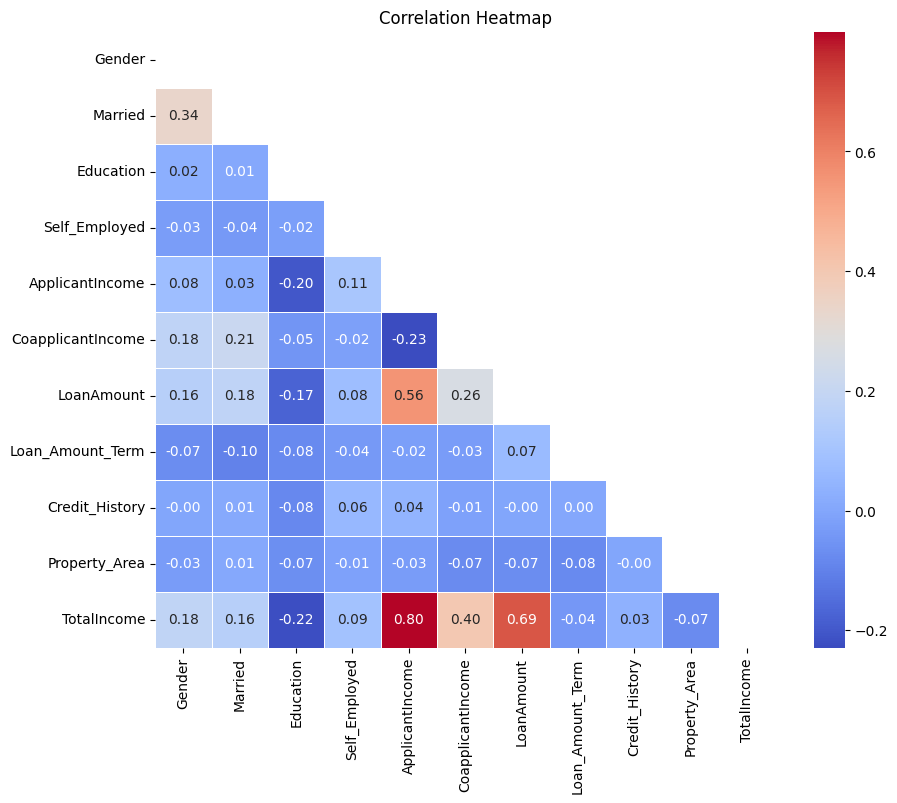

In [ ]:
# Exclude non-numeric columns (e.g., 'Loan_ID') from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


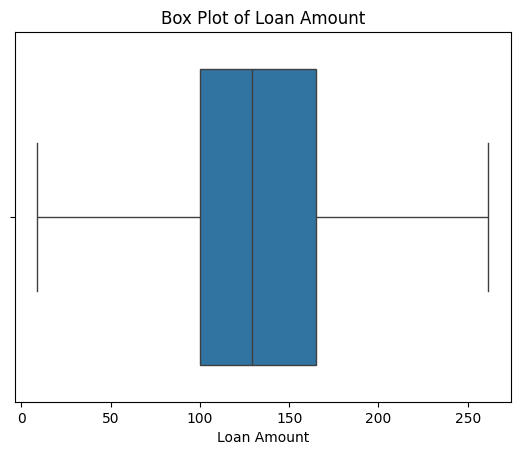

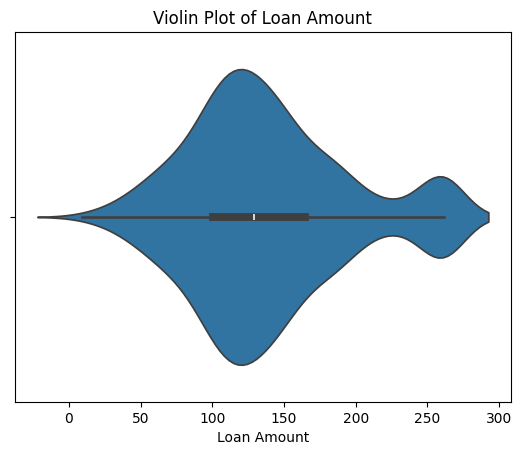

In [ ]:
# BOX PLOT
sns.boxplot(x=data['LoanAmount'])

plt.title('Box Plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()



# VIOLIN PLOT
sns.violinplot(x=data['LoanAmount'])

plt.title('Violin Plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()


# PAIR PLOT
